In [23]:
#import liabraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder


In [16]:
# Load the dataset
df=pd.read_csv('C:\AI and ML\Machine Learning\Machine-Learning\Decision_tree\drug200.csv')

# Display basic information about the dataset
df.info(),df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


(None,
    Age Sex      BP Cholesterol  Na_to_K   Drug
 0   23   F    HIGH        HIGH   25.355  drugY
 1   47   M     LOW        HIGH   13.093  drugC
 2   47   M     LOW        HIGH   10.114  drugC
 3   28   F  NORMAL        HIGH    7.798  drugX
 4   61   F     LOW        HIGH   18.043  drugY)

In [17]:
#have to be converted into numerical ones to be used for modeling. For this, we can make use of LabelEncoder from the Scikit-Learn library.

label_encoder = {}

for col in ['Sex','BP','Cholesterol','Drug']:
    le=LabelEncoder()
    '''
    le = LabelEncoder()

Creates a LabelEncoder object from sklearn.preprocessing.
le.fit_transform(df[col])

fit() learns the mapping from categorical values to numbers.
transform() replaces categorical values with corresponding numbers.
df[col] = ...

Stores the transformed numerical values back into the dataset.
    '''
    df[col]=le.fit_transform(df[col]) #which converts categorical data into numerical value
    label_encoder[col] = le


In [18]:
#split data intor features (X) AND Target (Y)
'''
X = df.drop(columns=['Drug'])
Removes the Drug column from the dataset and stores the remaining columns in X.
Why?:
X represents the features (input variables) used to predict the drug.

y = df['Drug']
What it does: Selects the Drug column and stores it in y.
Why?:
y is the target variable (labels) that the model will learn to predict.
It contains the drug prescribed based on the features.
'''
X=df.drop(columns=['Drug']) 
y=df['Drug']

#split data into training and testing data (80% train,20% test)
'''
Splits X (features) and y (target labels) into two parts:
80% for training (X_train, y_train) → used to train the model.
20% for testing (X_test, y_test) → used to evaluate model accuracy.
test_size=0.2

20% of the data goes into the test set, and 80% goes into the training set.
If the dataset had 200 samples, then:
160 samples → training (X_train, y_train)
40 samples → testing (X_test, y_test)
'''
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


In [19]:
#train decision tree classifier
clf=DecisionTreeClassifier(criterion='entropy',random_state=42)
clf.fit(X_train,y_train)

#prediction on test data
y_pred=clf.predict(X_test)

#evaluate the model performance
accuracy=accuracy_score(y_test,y_pred)
print('Model accuracy:',accuracy)

Model accuracy: 1.0


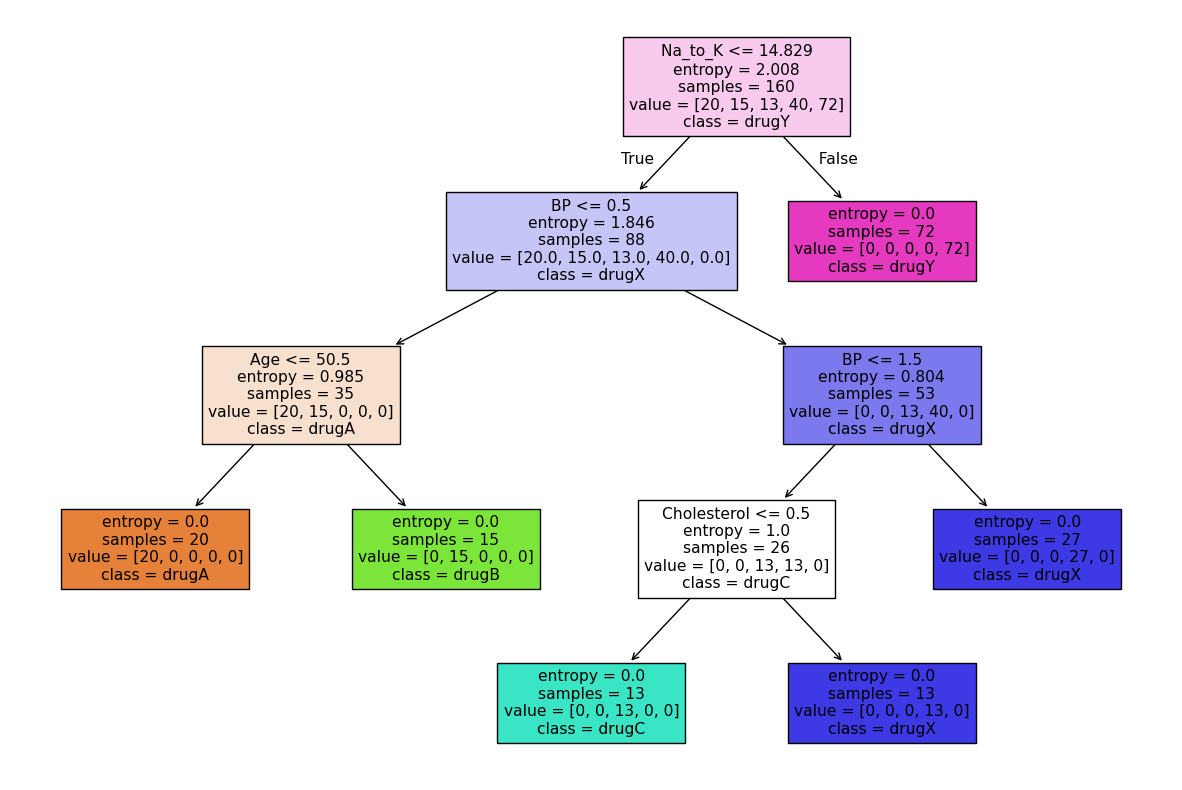

In [26]:
#plot a decision tree
plt.figure(figsize=(15,10))

plot_tree(clf,feature_names=X.columns,class_names=label_encoder['Drug'].classes_,filled=True)
plt.show()